#### **1. Import Data and Analyze Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# pandas=[]
# with open('data.csv','r', newline= "") as x :
#     reader = csv.DictReader(x)
#     for i in reader:
#         pandas.append(dict(i))

In [3]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})
df.replace({'':np.NaN},inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##### **1.1 Cleaning Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
dfInfo = pd.DataFrame({
    'columnType' : [col for col in df.dtypes],
    'nullValues (nb)' : [null for null in df.isnull().sum()],
    'nullValues (%)' : [null for null in (df.isnull().sum()/df.shape[0])*100]
}).T.rename(columns={key:val for key,val in enumerate(df.columns)})
# dfInfo = dfInfo(set_index= df.columns)
dfInfo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
columnType,object,object,object,int64,datetime64[ns],float64,object,object
nullValues (nb),0,0,1454,0,0,0,135080,0
nullValues (%),0,0,0.268311,0,0,0,24.9267,0


Karena missing value tersebut hanya terdapat dalam fitur **CustomerID** dan **Description**  dan kita akan mengklasifikasi bagian tersebut maka kita tidak bisa mengganti missing value tersebut, jadi kita harus menghapus missing value tersebut.

In [7]:
df = df.dropna(axis=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
dfInfo = pd.DataFrame({
    'columnType' : [col for col in df.dtypes],
    'nullValues (nb)' : [null for null in df.isnull().sum()],
    'nullValues (%)' : [null for null in (df.isnull().sum()/df.shape[0])*100]
}).T.rename(columns={key:val for key,val in enumerate(df.columns)})
# dfInfo = dfInfo(set_index= df.columns)
dfInfo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
columnType,object,object,object,int64,datetime64[ns],float64,object,object
nullValues (nb),0,0,0,0,0,0,0,0
nullValues (%),0,0,0,0,0,0,0,0


Setelah tidak terdapat missing values, kita juga harus mengecek duplikat data di dalam dataset, dan akan menghapus jika terdapat duplikat.

In [9]:
df[df.duplicated()==True]
df.duplicated().sum()

5225

In [10]:
df = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##### **1.2 Explonatory Analysis**

##### 1.2.1 Countries

In [11]:
print('Daftar negara yang membuat transaksi :',df.nunique()['Country'])

Daftar negara yang membuat transaksi : 37


In [12]:
a = 0
listTotal = []
listCountry = []
listPct = []
for i,item in enumerate(df['Country'].unique()):
    listTotal.append(df[(df['Country']== item ) & True].shape[0])
    a = a + df[(df['Country']== item ) & True].shape[0]
    listCountry.append(item)
    listPct.append(round((listTotal[i]/df.shape[0])*100,2))


print('Jumlah Negara yang bertransaksi : Total Transaksi {}'.format(a))

country = pd.DataFrame({'Negara' : df['Country'].unique(),'Total Customer' : listTotal,'Percentage' : listPct})
country.head()

Jumlah Negara yang bertransaksi : Total Transaksi 401604


,Negara,Total Customer,Percentage
0,United Kingdom,356728,88.83
1,France,8475,2.11
2,Australia,1258,0.31
3,Netherlands,2371,0.59
4,Germany,9480,2.36


##### 1.2.2 Customers and Product

In [13]:
Table = pd.DataFrame({
    'products' : [df['StockCode'].nunique()],
    'transaction' : [df['InvoiceNo'].nunique()],
    'customers' : [df['CustomerID'].nunique()]
}).rename(index={0:'quantity'})
# Table = Table(set_index= 'quantity')
Table

,products,transaction,customers
quantity,3684,22190,4372


Dapat dilihat bahwa 4372 pengguna dan 3684 produk berbeda. Jumlah total transaksi lebih dari 22.000.
Sekarang kita akan menentukan jumlah produk yang dibeli dalam setiap transaksi:

In [14]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
temp = temp.rename(columns={'InvoiceDate':'Number of Product'})
temp.head()

,CustomerID,InvoiceNo,Number of Product
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


Baris pertama dari daftar ini menunjukkan beberapa hal yang menarik:
<li>Tedapat data di dalam column InvoiceNo dengan awalan C: ini menunjukkan transaksi yang telah dibatalkan</li>
<li>Terdapat transaksi yang hanya sekaliseumur hidup (mis. 12346)</li>
<li>Terdapat sejumlah besar item di setiap pesanan</li>

##### 1.2.3 Cancelation Order

Karena order yang di cancel terdapat di Customer dengan urutan pertama bila di sort, maka kita akan melihat bentuk data di dalam dataframe untuk membaca data cancel tersebut. Tetapi sebelumnya kita lihat berapa persen pesanan yang di cancel terlebih dahulu.

In [15]:
temp['order canceled'] = temp['InvoiceNo'].apply(lambda x: int('C' in x))
display(temp.head())
print('Jumlah order yang di cancel :',(temp['order canceled'].sum()/temp['order canceled'].shape[0]*100),'%')

,CustomerID,InvoiceNo,Number of Product,order canceled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0


Jumlah order yang di cancel : 16.466876971608833 %


In [16]:
df.sort_values('CustomerID').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland


Berdasarkan dataframe diatas, kami melihat bahwa ketika pesanan dibatalkan terdapat atau tercatat sebagai transaksi lain (dilihat dari column Quantity: 74215 dan -74215) karena sebagian besar identik kecuali untuk variabel Quantity dan InvoiceNo. 
Saya memutuskan untuk memeriksa apakah terdapat treansaksi lain yang sepert ini. Jadi,saya mencoba untuk menemukan data yang menunjukkan Quantity yang negatif dan memeriksa apakah ada pesanan yang mirip seperti contoh diatas, yaitu semua identi kecuali variable Quantity(positif) dan InvoiceNo. --> (terdapat counterpart)

In [17]:
df_check = df[df['Quantity'] < 0][['InvoiceNo','CustomerID','Quantity','StockCode','Description','UnitPrice']]
for item in df_check.index:
    if df[(df['CustomerID'] == df_check.loc[item,'CustomerID']) & (df['Quantity'] == -int(df_check.loc[item,'Quantity'])) & (df['Description'] == df_check.loc[item,'Description'])].shape[0] == 0: 
        print(df_check.loc[item])
        break

InvoiceNo       C536379
CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object


In [18]:
df[df['CustomerID']== '14527'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom


Kenyataannya tidak semua Quantity yang negatif tersebut terdapat pesanan yang mirip, salah satu contoh diatas terdapat **Description** Discount dan tidak terdapat pesanan yang mirip seperti contoh diatas, yaitu semua identi kecuali variable Quantity(positif) dan InvoiceNo.Saya merasa bahwa hipotesis awal tidak terpenuhi karena adanya description 'Discount'. Saya memeriksa kembali hipotesisnya tetapi kali ini mengabaikan Description 'Discount':

In [19]:
df_check2 = df[(df['Quantity'] < 0)&(df['Description']!='Discount')][['InvoiceNo','CustomerID','Quantity','StockCode','Description','UnitPrice']]
for item in df_check.index :
    if df[(df['CustomerID'] == df_check.loc[item,'CustomerID']) & (df['Quantity'] == -int(df_check.loc[item,'Quantity'])) & (df['Description'] == df_check.loc[item,'Description'])].shape[0] == 0:
        print(df_check.loc[item])
        break

InvoiceNo       C536379
CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object


In [20]:
df[(df['CustomerID']=='15311')&(df['Description']=='SET OF 3 COLOURED  FLYING DUCKS')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom


Sekali lagi, saya menemukan bahwa hipotesis awal salah. Karenanya, pembatalan tidak harus sesuai dengan pesanan yang seharusnya dilakukan sebelumnya.
Kemudian, saya memutuskan untuk membuat list yang memishkan bagian mana yang cancel dengan terdapat counterpart dan yang tidak terdapat counterpart. Di bawah ini, saya membuat sensus dari pesanan yang dibatalkan dan membedakan mana yang terdapat **counterpart** dan yang **nocounterpart**:

In [21]:
dfCleaned = df.copy()
df['Quantity'] = df['Quantity'].astype('int64')
dfCleaned['QuantityCanceled'] = 0
dfCleaned.head()

counterpart = []
nocounterpart = []
for index, col in  df.iterrows():
#     print(index)
#     print(df['CustomerID'].dtypes)
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity']   > 0)].copy()
    if (df_test.shape[0] == 0): 
#         print(df_test.shape[0])
        nocounterpart.append(index)
#         print(doubtfullData)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        dfCleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        counterpart.append(index)
#         print('ini remove',remove)
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if int(val['Quantity']) < -col['Quantity']: continue
            dfCleaned.loc[index, 'QuantityCanceled'] = -col['Quantity']
            counterpart.append(index) 
            break

In [22]:
print("counterpart: {}".format(len(counterpart)))
print("nocounterpart: {}".format(len(nocounterpart)))

counterpart: 7521
nocounterpart: 1226


Kemudian, saya memutuskan untuk menghapus semua entri ini, yang masing-masing terhitung sekitar 1,4% dan 0,2% dari dataframe.
Sekarang saya memeriksa jumlah entri yang terkait dengan pembatalan dan yang belum dihapus dengan filter sebelumnya:

In [23]:
dfCleaned.drop(counterpart, axis = 0, inplace = True)
dfCleaned.drop(nocounterpart, axis = 0, inplace = True)
remainingEntries = dfCleaned[(dfCleaned['Quantity'] < 0) & (dfCleaned['StockCode'] != 'D')]
print("data yang belum di delete: {}".format(remainingEntries.shape[0]))
remainingEntries[:5]

data yang belum di delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


In [24]:
dfCleaned.drop(remainingEntries.index, axis = 0, inplace = True)

In [33]:
#Menyimpan file yang telah di cleaning
dfCleaned.to_csv('dfCleaned.csv')

In [123]:
dfCleaned = pd.read_csv('dfCleaned.csv', index_col = False)
dfCleaned = dfCleaned.drop('Unnamed: 0',axis='columns')
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


##### 1.2.4 StockCode

Di atas, telah terlihat bahwa beberapa nilai variabel StockCode menunjukkan transaksi tertentu (mis. D untuk Diskon). Saya memeriksa konten variabel ini dengan mencari sekumpulan kode yang hanya akan berisi huruf:

(Disini saya memakai regex(regular expression) untuk menemukan StockCode yang hanya berisi huruf, karena mayoritas StockCode berisi angka dan huruf, seperti contoh diatas)

In [124]:
listSpecialCode = dfCleaned[dfCleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
listSpecialCode

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [125]:
for code in listSpecialCode:
    print("{:<15} -> {:<30}".format(code, dfCleaned[dfCleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


StockCode diatas tidak bisa menjadi ciri pelanggan kami, jadi kita akan membuang transaksi tersebut dari basis data kami.

In [126]:
for i in listSpecialCode:
    dfCleaned = dfCleaned.drop(dfCleaned[dfCleaned['StockCode']==i].index,axis=0)

##### 1.2.5 Outliers

In [127]:
dfCleaned.describe()

,Quantity,UnitPrice,CustomerID,QuantityCanceled
count,391183.000000,391183.000000,391183.000000,391183.000000
mean,13.179665,2.874130,15295.083503,0.526667
std,181.907403,4.284639,1710.359579,175.825115
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,0.000000
50%,6.000000,1.950000,15158.000000,0.000000
75%,12.000000,3.750000,16794.000000,0.000000
max,80995.000000,649.500000,18287.000000,80995.000000


Nilai min di UnitPrice adalah 0, coba kita periksa terlebih dahulu.

In [128]:
dfCleaned[dfCleaned['UnitPrice']==0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
6746,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0
22103,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0
24901,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0
28591,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0
28593,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0


Saya tergoda untuk mengganti nilai nol dengan yang harga tiap barang dalam description tetapi mungkin terdapat diskon khusus atau sesuatu yang lain jadi saya akan membiarkannya begitu saja.

##### **1.3 Rekayasa Fitur**

##### 1.3.1 Total Price

In [129]:
def unique_counts(data):
   for i in dfCleaned.columns:
       count = dfCleaned[i].nunique()
       print(i, ": ", count)
unique_counts(dfCleaned)

InvoiceNo :  18405
StockCode :  3659
Description :  3871
Quantity :  300
InvoiceDate :  17169
UnitPrice :  356
CustomerID :  4335
Country :  37
QuantityCanceled :  83


In [130]:
dfCleaned['TotalPrice'] = dfCleaned['UnitPrice'] * (dfCleaned['Quantity'] - dfCleaned['QuantityCanceled'])
# dfCleaned.sort_values('CustomerID')[:5]
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


Dengan adanya fitur baru yaitu TotalPrice maka kita sekarang dapat melihat nilai moneter negara-negara berkat fitur ini. Saya akan melihat menggunakan Bar Plot yang dengan Pandas Data Vizualitation

Text(0.5, 1.0, 'Revenue per Country')

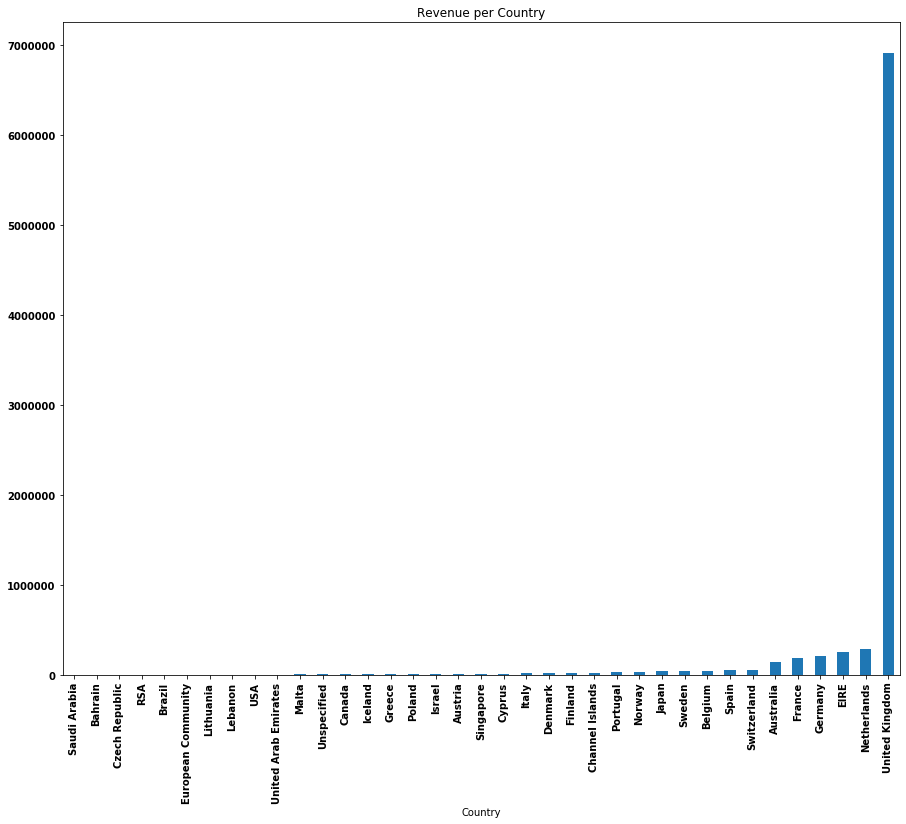

In [131]:
revenue_per_countries = dfCleaned.groupby(["Country"])["TotalPrice"].sum().sort_values()
revenue_per_countries.plot(kind='bar', figsize=(15,12))
plt.title("Revenue per Country")

Text(0.5, 1.0, 'Number of Invoices per Country')

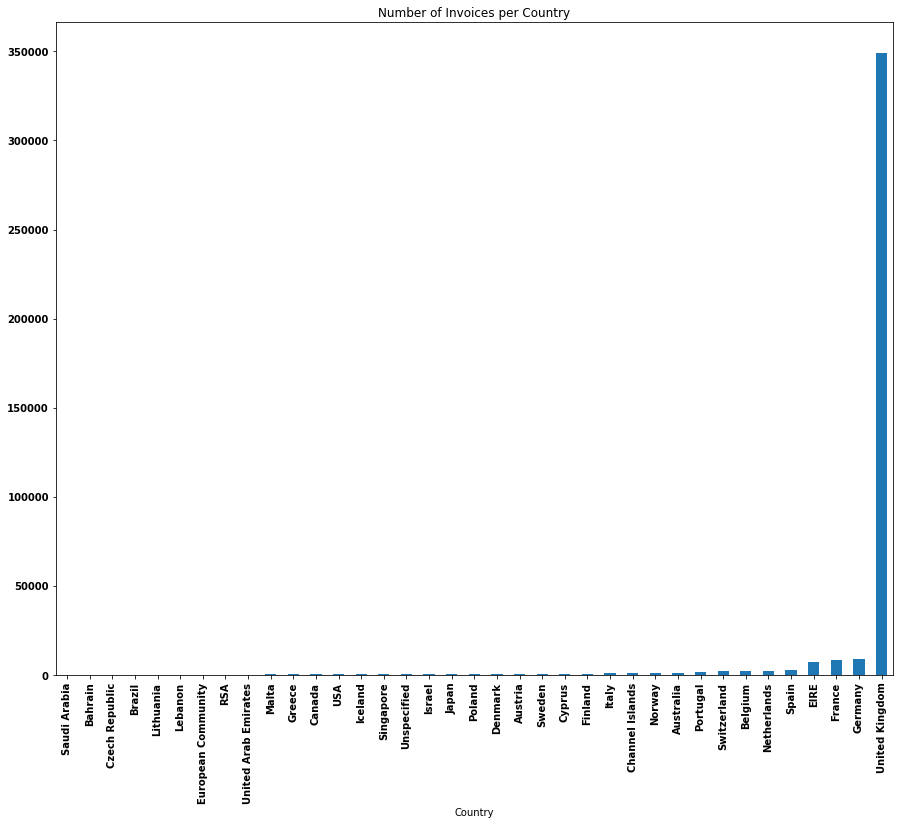

In [132]:
No_invoice_per_country = dfCleaned.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.plot(kind='bar', figsize=(15,12))
plt.title("Number of Invoices per Country")

Ini sangat menarik karena kita dapat melihat bahwa Belanda adalah negara ke-2 nilainya walaupun memiliki Invoice lebih sedikit daripada negara-negara seperti Jerman atau Perancis misalnya dan 10 kali lebih sedikit Customer. (95, 87 dan 9 untuk Jerman, Perancis, dan Belanda)

In [133]:
dfCleaned['InvoiceDate'] = pd.to_datetime(dfCleaned['InvoiceDate'])

In [134]:
#___________________________________________
# Jumlah pembelian dan jumlah pemesanan
temp = dfCleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basketPrice = temp.rename(columns = {'TotalPrice':'Basket Price'})
#_____________________
# Tanggal pemesanan
dfCleaned['InvoiceDate_int'] = dfCleaned['InvoiceDate'].astype('int64')
temp = dfCleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
dfCleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basketPrice.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basketPrice = basketPrice[basketPrice['Basket Price'] > 0]
basketPrice.sort_values('CustomerID').head()

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000


In [135]:
display(basketPrice[basketPrice['Basket Price'] == basketPrice['Basket Price'].min()])
display(dfCleaned[(dfCleaned['TotalPrice'] == 0.38)&(dfCleaned['InvoiceNo'] == '570554')])

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
7897,14800,570554,0.38,2011-10-11 11:02:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
279921,570554,84341B,SMALL PINK MAGIC CHRISTMAS TREE,1,2011-10-11 11:02:00,0.38,14800,United Kingdom,0,0.38


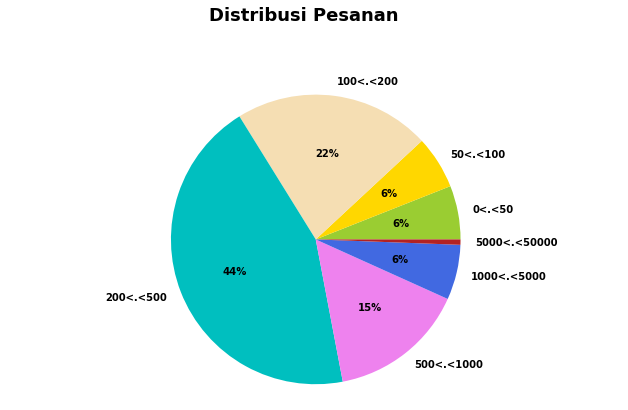

In [136]:
priceRange = [0, 50, 100, 200, 500, 1000, 5000, 50000]
countPrice = []
for i, price in enumerate(priceRange):
    if i == 0: continue
    val = basketPrice[(basketPrice['Basket Price'] < price) &
                       (basketPrice['Basket Price'] > priceRange[i-1])]['Basket Price'].count()
    countPrice.append(val)
#____________________________________________
# Représentation du nombre d'achats / montant        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(priceRange[i-1], s) for i,s in enumerate(priceRange) if i != 0]
sizes  = countPrice
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribusi Pesanan", ha='center', fontsize = 18)
plt.show()

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dfCleaned['Country'])

LabelEncoder()

In [138]:
l = [i for i in range(dfCleaned['Country'].nunique())]
dict(zip(list(le.classes_), l))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [139]:
dfCleaned['Country'] = le.transform(dfCleaned['Country'])

In [140]:
with open('labelencoder.pickle', 'wb') as g:
    pickle.dump(le, g)

In [141]:
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34


##### 1.3.2 RFM Principle

Saya akan menerapkan prinsip RFM di sini untuk mengklasifikasikan pelanggan dalam dataframe ini.
Bagian ini terinspirasi oleh karya Susan Li. RFM adalah kependekan dari Recency, Frekuensi dan Moneter.
Ini adalah teknik segmentasi pelanggan yang menggunakan perilaku pembelian masa lalu untuk membagi pelanggan menjadi beberapa kelompok.

In [142]:
print(dfCleaned['InvoiceDate'].min())
print(dfCleaned['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


 Saya akan menetapkan tanggal satu hari setelah tanggal terkhir terjadinya transaksi.


In [143]:
NOW = dt.datetime(2011,12,10)
dfCleaned['InvoiceDate'] = pd.to_datetime(dfCleaned['InvoiceDate'])

Terinspirasi oleh Miljan Stojiljkovic, saya menggunaan fungsi agg (aggreagtion) untuk memberikan fleksibilitas menerapkan banyak fungsi sekaligus , atau meneruskan daftar fungsi ke setiap kolom.

In [144]:
customAggregation = {}
customAggregation["InvoiceDate"] = lambda x:x.iloc[0]
customAggregation["CustomerID"] = lambda x:x.iloc[0]
customAggregation["TotalPrice"] = "sum"

rfmTable = dfCleaned.groupby("InvoiceNo").agg(customAggregation)
rfmTable.head()

,InvoiceDate,CustomerID,TotalPrice
InvoiceNo,,,
536365,2010-12-01 08:26:00,17850,139.12
536366,2010-12-01 08:28:00,17850,22.20
536367,2010-12-01 08:34:00,13047,278.73
536368,2010-12-01 08:34:00,13047,70.05
536369,2010-12-01 08:35:00,13047,17.85


In [145]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]")
rfmTable.head()

,InvoiceDate,CustomerID,TotalPrice,Recency
InvoiceNo,,,,
536365,2010-12-01 08:26:00,17850,139.12,373.0
536366,2010-12-01 08:28:00,17850,22.20,373.0
536367,2010-12-01 08:34:00,13047,278.73,373.0
536368,2010-12-01 08:34:00,13047,70.05,373.0
536369,2010-12-01 08:35:00,13047,17.85,373.0


In [146]:
customAggregation = {}

customAggregation["Recency"] = ["min", "max"]
customAggregation["InvoiceDate"] = lambda x: len(x)
customAggregation["TotalPrice"] = "sum"

rfmTableFinal = rfmTable.groupby("CustomerID").agg(customAggregation)

In [147]:
rfmTableFinal.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]
rfmTableFinal.head()

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346,325.0,325.0,1,0.00
12347,2.0,367.0,7,4310.00
12348,75.0,358.0,4,1437.24
12349,18.0,18.0,1,1457.55
12350,310.0,310.0,1,294.40


Dari data diatas maka :
    <ol>
    <li>**min_recency** adalah waktu terdekat customer melakukan transaksi</li>
    <li>**max_recency** adalah waktu terjauh customer melakukan transaksi</li>
    <li>**frequency** adalah berapa kali customer melakukan transaksi (1 hari terhitung 1 kali transaksi)</li>
    <li>**monetary** value adalah jumlah uang yang dikeluarkan untuk transaksi tersebut</li>

In [150]:
quantiles = rfmTableFinal.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [151]:
quantiles

{'min_recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'max_recency': {0.25: 112.0, 0.5: 248.0, 0.75: 326.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'monetary_value': {0.25: 298.15999999999997,
  0.5: 653.19,
  0.75: 1617.0549999999998}}

In [152]:
segmentedRFM = rfmTableFinal

In [153]:
segmentedRFM[segmentedRFM['min_recency'] <= quantiles['min_recency'] [0.25]].head()

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12347,2.0,367.0,7,4310.00
12358,1.0,150.0,2,928.06
12362,3.0,295.0,10,4667.53
12364,7.0,112.0,4,1208.10
12367,4.0,4.0,1,150.90


In [154]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [155]:
segmentedRFM['r_quartile'] = segmentedRFM['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmentedRFM['f_quartile'] = segmentedRFM['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmentedRFM['m_quartile'] = segmentedRFM['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmentedRFM.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4
12347,2.0,367.0,7,4310.00,1,1,1
12348,75.0,358.0,4,1437.24,3,2,2
12349,18.0,18.0,1,1457.55,2,4,2
12350,310.0,310.0,1,294.40,4,4,4


In [156]:
segmentedRFM['RFMScore'] = segmentedRFM['r_quartile'].astype('str')+segmentedRFM['f_quartile'].astype('str')+segmentedRFM['m_quartile'].astype('str')
segmentedRFM.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4,444
12347,2.0,367.0,7,4310.00,1,1,1,111
12348,75.0,358.0,4,1437.24,3,2,2,322
12349,18.0,18.0,1,1457.55,2,4,2,242
12350,310.0,310.0,1,294.40,4,4,4,444


In [157]:
segmentedRFM[segmentedRFM['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
14646,1.0,354.0,73,279138.02,1,1,1,111
18102,0.0,367.0,60,259657.30,1,1,1,111
17450,8.0,367.0,46,194390.79,1,1,1,111
14911,1.0,373.0,198,134408.73,1,1,1,111
14156,9.0,371.0,54,115835.53,1,1,1,111


<img src='../LatihanPython/Latihan/RFM category.png'/>

In [158]:
# def Segmented(x):
#     if x == '444' :
#         return 'Lost Cheap Customer'
#     elif x == '111':
#         return 'Best Customer'
#     elif x == '311':
#         return 'Almost Lost Customer'
#     elif x == '222':
#         return 'Normal Customer'
#     elif x == '411':
#         return 'Lost Customer'
#     elif x == '221' or x == '321' or x== '421' or x== '211' or x== '231' or x== '431' or x=='121' or x =='131':
#         return 'Potential Big Spender'
#     elif x == '212' or x =='322'or x =='122'or x =='423'or x =='123'or x =='223'or x =='323'or x =='324'or x =='224'or x =='124'or x =='422'or x =='424':
#         return 'Potential Customer'
#     else:
#         return 'Need More Treatment'

In [159]:
# segmentedRFM['Segmented'] = segmentedRFM['RFMScore'].apply(Segmented)

In [160]:
# segmentedRFM.to_csv('segmentedRFM.csv')

In [161]:
# dfRFM = pd.read_csv('segmentedRFM.csv')
# dfRFM = dfRFM.drop(['r_quartile','f_quartile','m_quartile','Segmented'],axis=1)
# dfRFM.head()

In [162]:
dfCleaned = pd.merge(dfCleaned,segmentedRFM, on='CustomerID')

In [163]:
dfCleaned = dfCleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30,372.0,373.0,34,5391.21,411
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00,372.0,373.0,34,5391.21,411
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411


##### 1.3.3 Time Feature

In [164]:
dfCleaned['Month'] = dfCleaned["InvoiceDate"].map(lambda x: x.month)
dfCleaned['Weekday'] = dfCleaned["InvoiceDate"].map(lambda x: x.weekday())
dfCleaned['Day'] = dfCleaned["InvoiceDate"].map(lambda x: x.day)
dfCleaned['Hour'] = dfCleaned["InvoiceDate"].map(lambda x: x.hour)
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30,372.0,373.0,34,5391.21,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00,372.0,373.0,34,5391.21,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8


In [166]:
dfCleaned.to_csv('dfCleaned_2.csv')

In [167]:
dfCleaned['Month'].value_counts()

11    62949
10    48613
12    42536
9     39510
5     27962
6     26820
3     26752
8     26688
7     26476
4     22347
1     20899
2     19631
Name: Month, dtype: int64

##### 1.3.4 Product Categories

Kita lihat contoh product yang dijual di column **Description**

In [168]:
for i in dfCleaned['Description'].unique()[20:30]:
    print(i)

JUMBO SHOPPER VINTAGE RED PAISLEY
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD


Fungsi dibawah mengambil data dari dataframe dan menganalisa isi dari kolom Deskripsi dengan melakukan operasi berikut:
<ol>
    <li>ekstrak nama yang layak dan lazim yang muncul dalam deskripsi produk</li>
    <li>untuk setiap nama, saya mengekstrak kata dasar dan mengumpulkan kumpulan nama yang terkait dengan kata dasar tersebut</li>
    <li>menghapus kata-kata yang muncul lebih dari 30%</li>
<li>ketika beberapa kata terdaftar untuk root yang sama, saya menganggap bahwa kata kunci yang terkait dengan root ini adalah nama terpendek.
    Langkah pertama dari analisis adalah untuk mengambil daftar produk:</li>

In [169]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
product = dfCleaned['Description'].unique()
stemmer = nltk.stem.porter.PorterStemmer()

def stemFilter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stemFilter, min_df=0.00, max_df=0.3)
# kita hapus kata-kata jika itu muncul lebih dari 30 % dari corpus.
TF_IDF_matrix = CV.fit_transform(product)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (3871, 1694) of float64


In [170]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (3871, 100) of float64


In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [172]:
score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)
print(score_tfidf)

[0.037646532549736905, 0.08651070405200846, 0.11871609019636249, 0.14753760584379996, 0.16205088735411524, 0.17716500600304672, 0.18675684594292896, 0.18746495032722854, 0.19136304185799466, 0.19163356068447876, 0.1918315105609856, 0.19362147092910909, 0.18991501549453335, 0.19876972147197627, 0.1893064082463243]


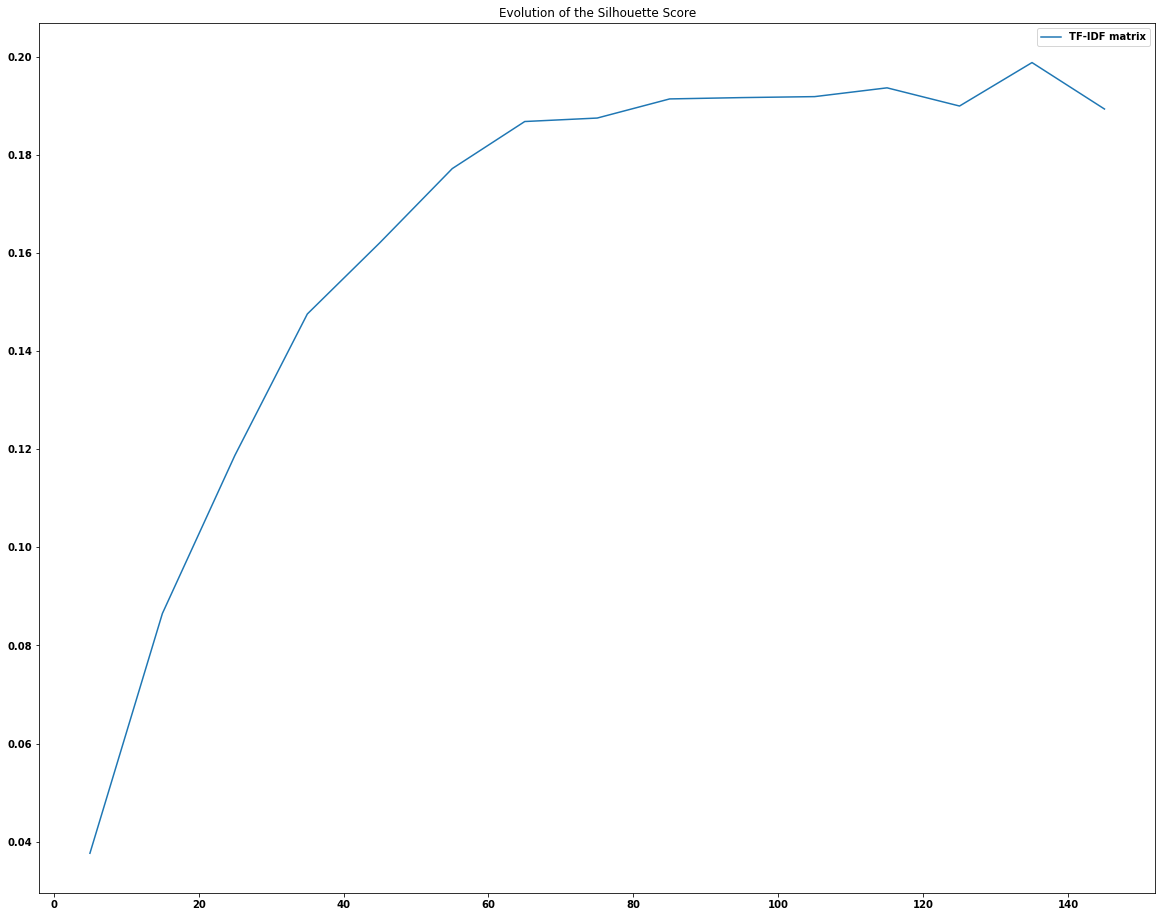

In [173]:
plt.figure(figsize=(20,16))

plt.subplot(1, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

Text(0.5, 1.0, 'Clustering Product with 135 clusters')

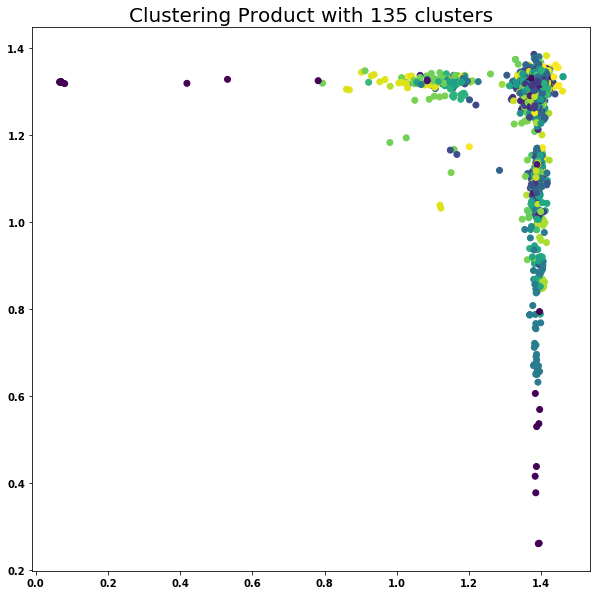

In [174]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Clustering Product with 135 clusters", fontsize="20")

[-54.63 -37.09 -17.93 ... -67.48 -66.05 -66.83]
[ -4.06 -35.58  10.18 ... -30.93 -31.84 -32.19]


Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

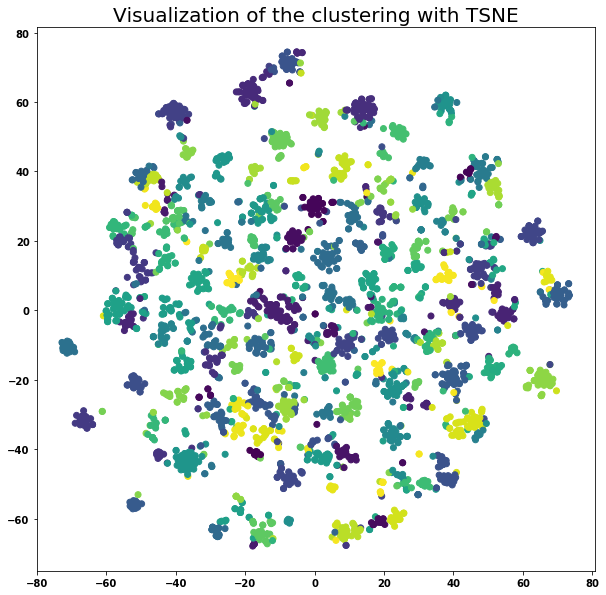

In [175]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)
print(proj[:,0])
print(proj[:,1])
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

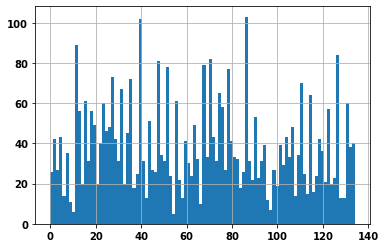

In [176]:
pd.Series(clusters).hist(bins=100)

<Figure size 432x288 with 0 Axes>

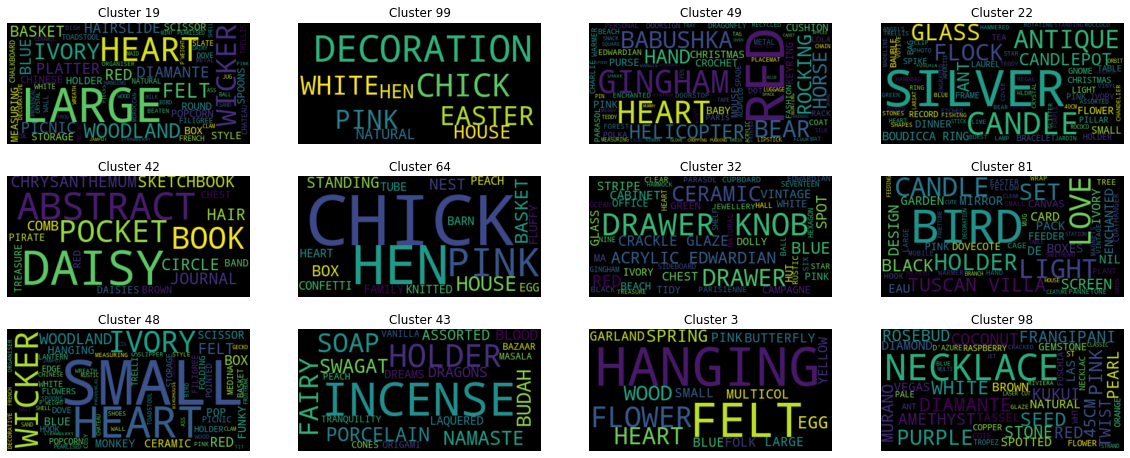

<Figure size 432x288 with 0 Axes>

In [177]:
import random
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(product[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

In [178]:
for num, cluster in enumerate(random.sample(range(100), 12)) :
    print(product[np.where(clusters==cluster)])
    break

['SMALL GLASS HEART TRINKET POT' 'CHRISTMAS PUDDING TRINKET POT '
 'ANTIQUE TALL SWIRLGLASS TRINKET POT' 'PINK DOUGHNUT TRINKET POT '
 'POTTING SHED TEA MUG' "POTTING SHED SOW 'N' GROW SET"
 'POTTING SHED SEED ENVELOPES' 'BLUE POT PLANT CANDLE '
 'DECORATIVE PLANT POT WITH FRIEZE' 'CITRONELLA CANDLE GARDEN POT'
 'S/3 POT POURI CUSHIONS BLUE COLOURS' 'POTTING SHED TWINE'
 'LOVE HEART TRINKET POT' 'RUSTIC STRAWBERRY JAM POT SMALL'
 'RUSTIC STRAWBERRY JAM POT LARGE ' 'SILVER VANILLA  FLOWER CANDLE POT'
 'KITCHEN FLOWER POTS WALL PLAQUE' 'SMALL KITCHEN FLOWER POTS PLAQUE'
 'SMALL SILVER FLOWER CANDLE POT' 'SET/3 POT PLANT CANDLES'
 'WHITE HEARTS WIRE PLANT POT HOLDER' 'PINK POT PLANT CANDLE'
 'CHOC TRUFFLE GOLD TRINKET POT ' 'YELLOW POT PLANT CANDLE'
 'ZINC HEARTS PLANT POT HOLDER' 'POTTING SHED ROSE CANDLE'
 'SILVER LATTICE VANILLA CANDLE POT' 'POTTING SHED CANDLE CITRONELLA'
 'WHITE WIRE PLANT POT HOLDER' 'ZINC PLANT POT HOLDER']


In [179]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(product, clusters)}
# print(dict_article_to_cluster)

In [180]:
with open('product_clusters.pickle', 'wb') as h:
    pickle.dump(dict_article_to_cluster, h)

#### **2. Mengkategorikan Customer**

##### **2.1 Pengelompokkan Dataset Berdasarkan Invoice**

In [181]:
cluster = dfCleaned['Description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster").mul(dfCleaned["TotalPrice"], 0)
df2 = pd.concat([dfCleaned['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum()
df2_grouped.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
536366,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
536367,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
536368,0.0,0.0,0.0,0.0,0.0,14.85,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.85
536369,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [182]:
customAggregation = {}
customAggregation["TotalPrice"] = lambda x:x.iloc[0]
customAggregation["min_recency"] = lambda x:x.iloc[0]
customAggregation["max_recency"] = lambda x:x.iloc[0]
customAggregation["frequency"] = lambda x:x.iloc[0]
customAggregation["monetary_value"] = lambda x:x.iloc[0]
customAggregation["CustomerID"] = lambda x:x.iloc[0]
customAggregation["Quantity"] = "sum"
customAggregation["Country"] = lambda x:x.iloc[0]


df_grouped = dfCleaned.groupby("InvoiceNo").agg(customAggregation)

##### **2.2 Pengelompokkan Dataset Final Berdasarkan Invoice**

In [183]:
df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
df2_grouped_final = df2_grouped_final.fillna(0)

In [184]:
customAggregation = {}
customAggregation["TotalPrice"] = ['min','max','mean']
customAggregation["min_recency"] = lambda x:x.iloc[0]
customAggregation["max_recency"] = lambda x:x.iloc[0]
customAggregation["frequency"] = lambda x:x.iloc[0]
customAggregation["monetary_value"] = lambda x:x.iloc[0]
customAggregation["Quantity"] = "sum"
customAggregation["Country"] = lambda x:x.iloc[0]

df_grouped_final = df_grouped.groupby("CustomerID").agg(customAggregation)
df_grouped_final.columns = ["min", "max", "mean", "min_recency", "max_recency", "frequency", "monetary_value", "quantity", "country"]
df_grouped_final.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country
CustomerID,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24


In [185]:
df2_grouped_final.head(5)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.000000
12347,0.0,0.013921,0.006032,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00181,0.020441,0.0,0.0,0.004594,0.00348,0.0,0.00181,0.000000,0.000000
12348,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.011828,0.000000
12349,0.0,0.000000,0.000000,0.0,0.0,0.0,0.055408,0.0,0.0,0.0,...,0.00000,0.130905,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.013653
12350,0.0,0.000000,0.060122,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.067255,0.00000,0.0,0.00000,0.000000,0.000000


##### **2.3 Clustering Customer**

Sebelumnya saya men-standarisasikan data yang ada di dataset saya

In [220]:
from sklearn.preprocessing import StandardScaler
X3 = df_grouped_final.copy()
x3 = X3.as_matrix()
scaler = StandardScaler()
dolan = scaler.fit(x3)

C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [221]:
with open('scaler.pickle', 'wb') as f:
    pickle.dump(dolan, f)

In [222]:
X1 = df_grouped_final.as_matrix()
X2 = df2_grouped_final.as_matrix()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[39644.611529363705, 32730.581489331962, 26913.460624663527, 22385.717765228903, 18488.236244416585, 14823.869491896912, 11662.313979302297, 9758.181901771917, 8875.302437241702, 8222.569075003143, 7424.066740106973, 6968.188158336964, 6401.787458323924, 5972.165522366676, 5676.375340891519, 5393.9022996560025, 5159.931943345069, 4864.241517821667, 4732.231612045162]


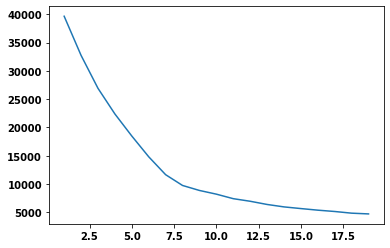

In [223]:
sse = []
for i in range(1,20):
    model = KMeans(n_clusters=i)
    model.fit(X_final_std_scale)
    sse.append(model.inertia_)
print(sse)

plt.plot(np.arange(1,20),sse)
plt.show()

In [224]:
x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

n_clusters = 2
The average silhouette_score is : 0.9666604766115394 with Std Scaling
n_clusters = 3
The average silhouette_score is : 0.8616705090950013 with Std Scaling
n_clusters = 4
The average silhouette_score is : 0.5205259787259768 with Std Scaling
n_clusters = 5
The average silhouette_score is : 0.3013443989653484 with Std Scaling
n_clusters = 6
The average silhouette_score is : 0.35681336747614845 with Std Scaling
n_clusters = 7
The average silhouette_score is : 0.4083854560881402 with Std Scaling
n_clusters = 8
The average silhouette_score is : 0.41428722608046337 with Std Scaling
n_clusters = 9
The average silhouette_score is : 0.4142422679048074 with Std Scaling
n_clusters = 10
The average silhouette_score is : 0.4161346305271196 with Std Scaling
n_clusters = 11
The average silhouette_score is : 0.42175111025151507 with Std Scaling


In [225]:
kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=30, random_state=0)
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

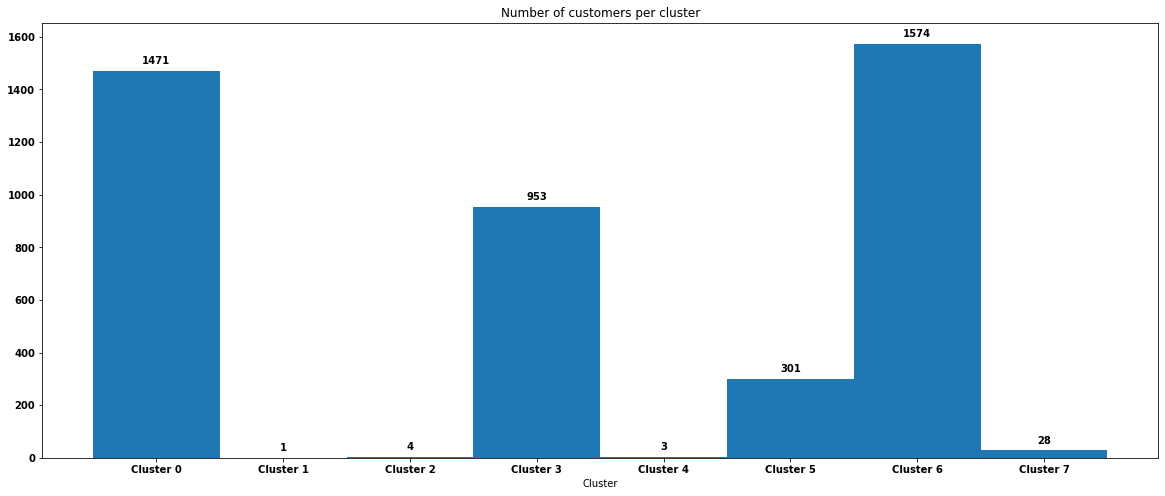

In [226]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(8)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [227]:
df_grouped_final["cluster"] = clusters

In [228]:
final_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
final_dataset.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,7,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.000000
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,5,...,0.00181,0.020441,0.0,0.0,0.004594,0.00348,0.0,0.00181,0.000000,0.000000
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,5,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.011828,0.000000
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,5,...,0.00000,0.130905,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.013653
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,3,...,0.00000,0.000000,0.0,0.0,0.067255,0.00000,0.0,0.00000,0.000000,0.000000


In [229]:
final_dataset_V2 = final_dataset.reset_index()

In [230]:
final_dataset_V2.to_csv("final_dataset_V2.csv",index=False)

In [231]:
# with open('df_cleaned.pickle', 'wb') as f:
#     pickle.dump(df_cleaned, f)

##### **2.4 Interpretasi Cluster**

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

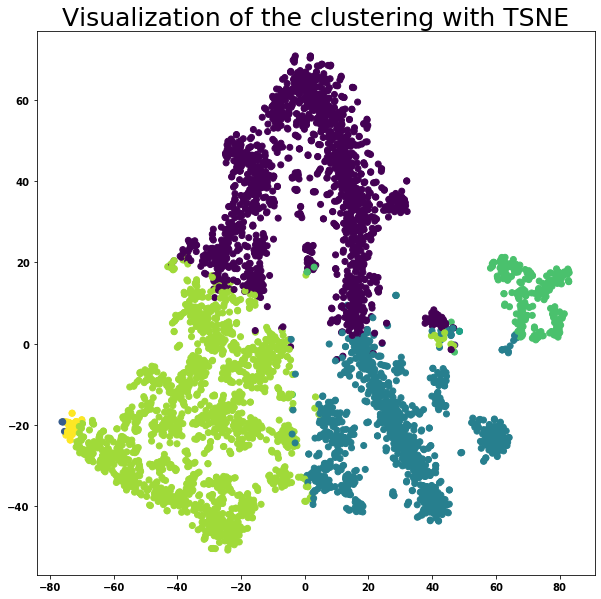

In [232]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="25")

Secara grafis cluster cukup khas. Mari kita lihat lebih dekat cluster yang berisi beberapa pelanggan.

##### 2.3.1 Clustering Customer

In [233]:
final_dataset.to_csv("final_dataset.csv")

In [234]:
final_dataset[final_dataset['cluster']==0].head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12357,19.80,19.80,19.800000,33.0,33.0,1,6207.67,2708,32,0,...,0.0,0.143059,0.000000,0.0,0.000000,0.019080,0.0,0.00000,0.002416,0.0
12371,5.04,5.04,5.040000,59.0,59.0,1,1527.96,582,32,0,...,0.0,0.016493,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.010799,0.0
12378,12.60,12.60,12.600000,129.0,129.0,1,4008.62,2529,32,0,...,0.0,0.073107,0.006301,0.0,0.007559,0.007514,0.0,0.00449,0.003293,0.0
12381,15.00,29.70,21.533333,4.0,119.0,3,1433.46,797,24,0,...,0.0,0.000000,0.022045,0.0,0.021347,0.000000,0.0,0.00000,0.000000,0.0
12384,15.00,25.00,20.000000,28.0,121.0,2,406.16,122,32,0,...,0.0,0.141816,0.000000,0.0,0.000000,0.055397,0.0,0.00000,0.000000,0.0


In [235]:
final_dataset[final_dataset['cluster']==0].mean()

min            23.479402
max            41.845139
mean           31.534987
min_recency    49.702243
max_recency    86.306594
                 ...    
Cluster_130     0.010005
Cluster_131     0.000351
Cluster_132     0.008245
Cluster_133     0.004245
Cluster_134     0.003621
Length: 145, dtype: float64

In [236]:
temp_final_df = final_dataset.reset_index()

In [237]:
temp_final_df['cluster'].unique()

array([7, 5, 3, 6, 0, 4, 2, 1], dtype=int64)

In [238]:
cust0 = list(temp_final_df[temp_final_df['cluster']==0]['CustomerID'])

In [239]:
cluster0 = dfCleaned[dfCleaned['CustomerID'].isin(cust0)]
# cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
#          , 'monetary_value']].mean()
cluster0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
298003,551986,22855,FINE WICKER HEART,2,2011-05-05 14:41:00,1.25,13888,35,0,2.50,119.0,218.0,2,595.67,333,5,3,5,14
298004,551986,84836,ZINC METAL HEART DECORATION,12,2011-05-05 14:41:00,1.25,13888,35,0,15.00,119.0,218.0,2,595.67,333,5,3,5,14
298005,551986,23181,BULL DOG BOTTLE TOP WALL CLOCK,2,2011-05-05 14:41:00,8.25,13888,35,0,16.50,119.0,218.0,2,595.67,333,5,3,5,14
298006,551986,22700,BLACK AND WHITE DOG BOWL,2,2011-05-05 14:41:00,2.95,13888,35,0,5.90,119.0,218.0,2,595.67,333,5,3,5,14
298007,551986,22854,CREAM SWEETHEART EGG HOLDER,2,2011-05-05 14:41:00,4.95,13888,35,0,9.90,119.0,218.0,2,595.67,333,5,3,5,14
298008,551986,23068,ALUMINIUM STAMPED HEART,4,2011-05-05 14:41:00,2.49,13888,35,0,9.96,119.0,218.0,2,595.67,333,5,3,5,14
298009,551986,22722,SET OF 6 SPICE TINS PANTRY DESIGN,1,2011-05-05 14:41:00,3.95,13888,35,0,3.95,119.0,218.0,2,595.67,333,5,3,5,14
298010,551986,84688,BEACH HUT DESIGN BLACKBOARD,2,2011-05-05 14:41:00,4.25,13888,35,0,8.50,119.0,218.0,2,595.67,333,5,3,5,14
298011,551986,72741,GRAND CHOCOLATECANDLE,9,2011-05-05 14:41:00,1.45,13888,35,0,13.05,119.0,218.0,2,595.67,333,5,3,5,14
298012,551986,23138,SINGLE WIRE HOOK IVORY HEART,12,2011-05-05 14:41:00,1.45,13888,35,0,17.40,119.0,218.0,2,595.67,333,5,3,5,14


In [240]:
cluster0['Description'].value_counts()[:10]

PAPER CHAIN KIT 50'S CHRISTMAS        273
BAKING SET 9 PIECE RETROSPOT          261
WHITE HANGING HEART T-LIGHT HOLDER    249
ASSORTED COLOUR BIRD ORNAMENT         248
REX CASH+CARRY JUMBO SHOPPER          220
HOT WATER BOTTLE KEEP CALM            216
REGENCY CAKESTAND 3 TIER              214
RABBIT NIGHT LIGHT                    200
GARDENERS KNEELING PAD KEEP CALM      198
SPOTTY BUNTING                        190
Name: Description, dtype: int64

In [241]:
customAggregation = {}
customAggregation["Country"] = lambda x:x.iloc[0]
customAggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(customAggregation)

In [242]:
cluster0_grouped['RFMScore'].value_counts()

344    199
343    140
244    139
243     88
222     65
122     61
144     58
233     51
333     48
133     46
342     45
232     42
332     39
132     37
121     33
143     31
111     29
234     29
123     28
223     26
134     25
444     23
242     18
443     17
322     17
323     16
334     16
221     15
341     12
112     10
124      8
324      6
434      6
331      6
321      6
131      5
224      5
211      4
142      3
212      3
442      3
241      3
231      3
311      2
441      1
433      1
423      1
432      1
424      1
Name: RFMScore, dtype: int64

In [243]:
cluster0_grouped['Country'].value_counts()

35    1424
30      10
32       8
26       7
24       7
31       4
33       3
25       3
36       2
34       1
27       1
23       1
Name: Country, dtype: int64

In [244]:
cluster0['Month'].value_counts()

11    20859
10    16968
9     10928
7      4962
8      4945
12     4886
6      2834
5      1378
Name: Month, dtype: int64

1378.0
2834.0
0.0
4962.0
0.0
4945.0
10928.0
0.0
16968.0
0.0
20859.0
4886.0


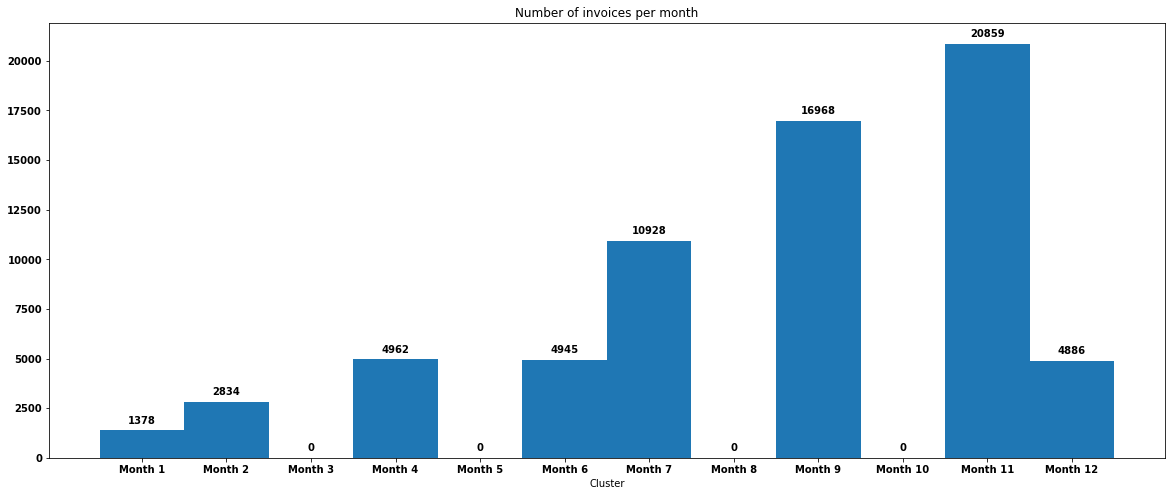

In [245]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])
for rect in patches:
    y_value = rect.get_height()
    print(y_value)
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [246]:
temp['Year'] = cluster0[cluster0['Month']==12]['InvoiceDate'].map(lambda x: x.year)
temp['Year'].value_counts()

Series([], Name: Year, dtype: int64)

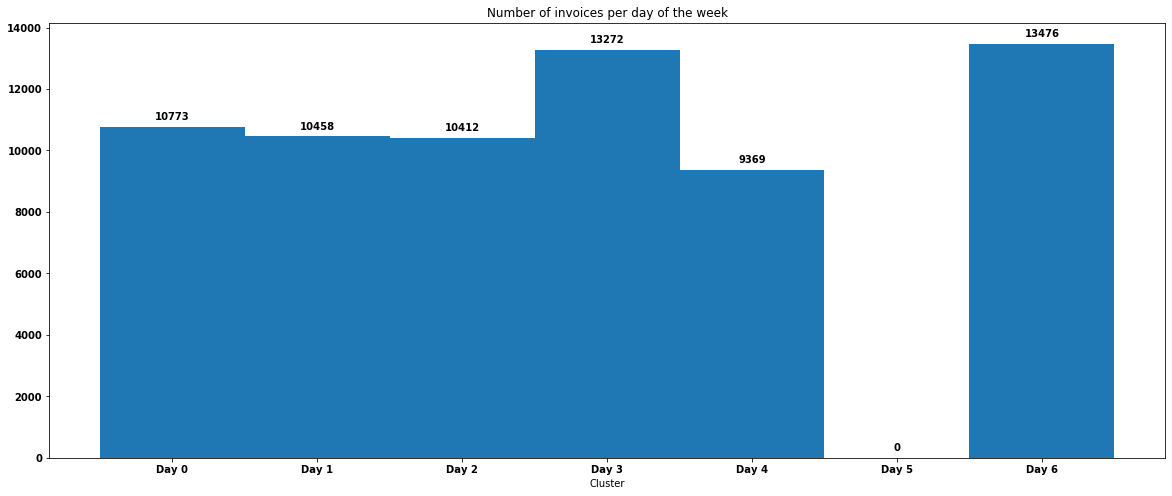

In [247]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Weekday'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

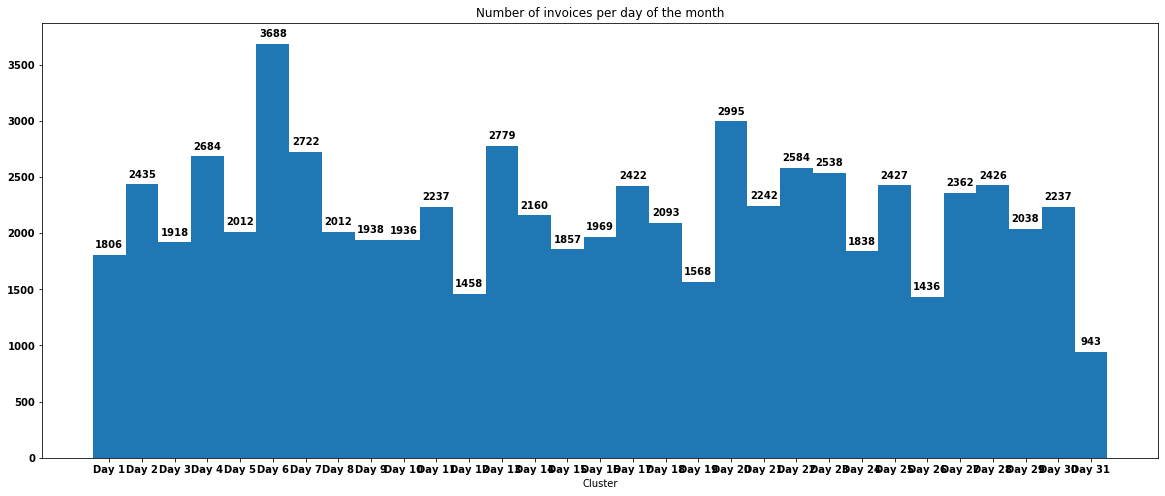

In [248]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Day'], bins=31)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(1,32)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

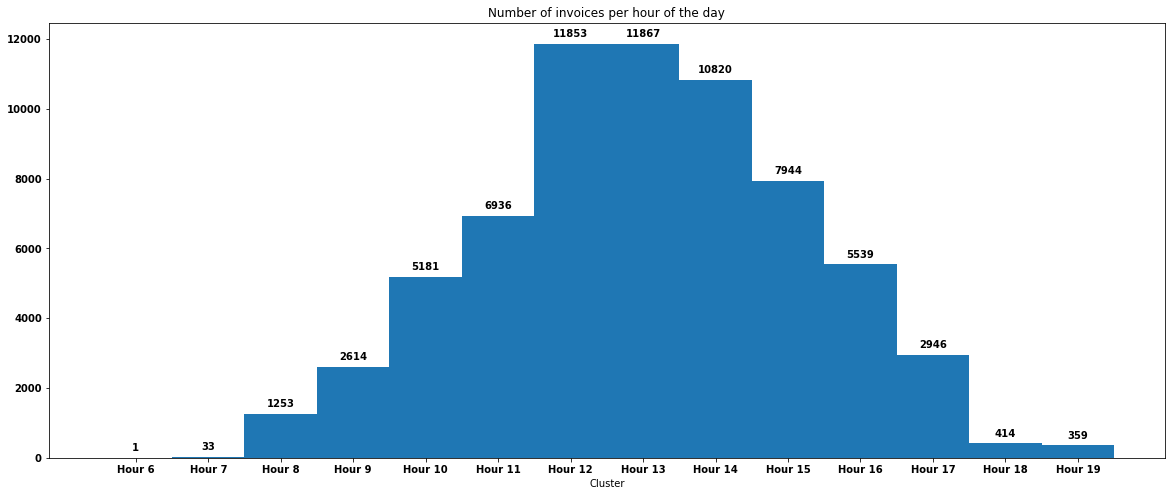

In [249]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Hour'], bins=14)
plt.xlabel("Cluster")
plt.title("Number of invoices per hour of the day")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Hour {}".format(x) for x in (sorted(cluster0['Hour'].unique()))])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

##### **3. Testing models for Prediction**

In [250]:
new_df = pd.read_csv("final_dataset_V2.csv")

In [251]:
new_df.head(5)

,CustomerID,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.000000
1,12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,...,0.00181,0.020441,0.0,0.0,0.004594,0.00348,0.0,0.00181,0.000000,0.000000
2,12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.011828,0.000000
3,12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,...,0.00000,0.130905,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.013653
4,12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,...,0.00000,0.000000,0.0,0.0,0.067255,0.00000,0.0,0.00000,0.000000,0.000000


In [252]:
X = new_df.drop(columns=['CustomerID', 'cluster']) 
y = new_df['cluster'].values

In [253]:
scaler = StandardScaler() # create scaler object

X_scaled = scaler.fit_transform(X)

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0) # Do 80/20 split

In [255]:
X_train.shape

(3468, 144)

##### **3.1 Testing Classic Models**

##### **3.1.1 Baseline**

In [256]:
from sklearn.dummy import DummyClassifier

In [257]:
dummy_biased = DummyClassifier(random_state=0)

dummy_biased.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='stratified')

In [258]:
print("Baseline accuracy", (dummy_biased.score(X_test, y_test))*100)

Baseline accuracy 29.06574394463668


##### **3.1.2 Linear Models**

In [259]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [260]:
# logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("LogisticRegression_classifier accuracy:", (lr.score(X_test, y_test))*100)

C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression_classifier accuracy: 93.88696655132641


In [261]:
# SGD Classifier

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
print("SGDClassifier accuracy:", (SGD.score(X_test, y_test))*100)

SGDClassifier accuracy: 93.54094579008074


##### **3.1.3 SVM**

In [262]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
print("LinearSVC accuracy:", (svc.score(X_test, y_test))*100)

LinearSVC accuracy: 92.61822376009228


C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### **3.2 Random Forest**

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
rfc=RandomForestClassifier(random_state=0, n_estimators = 1000)

In [265]:
param_grid = { 
    'n_estimators' : [100, 500, 1000],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6],
    'criterion' :['gini', 'entropy']
}

In [266]:
rfc=RandomForestClassifier(random_state=0, n_estimators = 1000, criterion='entropy', max_depth=6, max_features='auto')

In [267]:
rfc.fit(X_train, y_train)
print("Accuracy for Random Forest Classifier:", (rfc.score(X_test, y_test)*100))

Accuracy for Random Forest Classifier: 93.54094579008074


In [268]:
y_pred = rfc.predict(X_test)

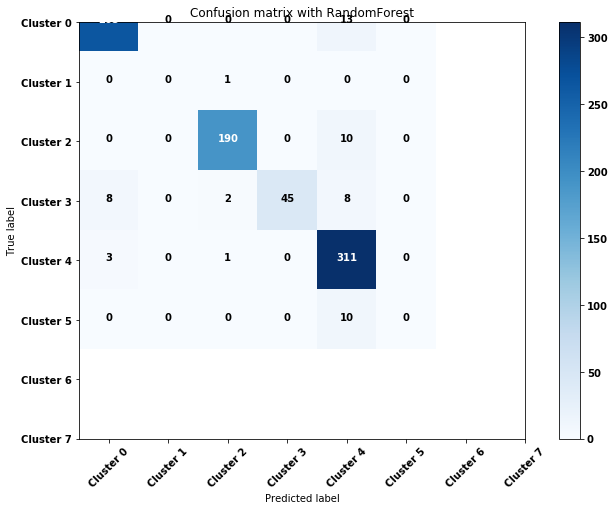

In [269]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ["Cluster {}".format(x) for x in range(8)]

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with RandomForest')

##### **3.3 XGBOOST**

In [270]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state = 0, learning_rate = 0.01, 
                                   objective = 'multi:softprob', n_estimators = 1000,
                                  colsample_bytree = 0.6, gamma = 0.5, max_depth = 7,
                                  min_child_weight = 1, subsample=0.8, n_jobs=-1, scoring='accuracy')

In [271]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='accuracy',
              seed=None, silent=None, subsample=0.8, verbosity=1)

In [273]:
print("Accuracy for XGBoost : ", (model.score(X_test, y_test))*100)

Accuracy for XGBoost :  98.0392156862745


In [274]:
with open('modelpredict.pkl','wb') as x :
    pickle.dump(model, x)

In [275]:
y_pred = model.predict(X_test)

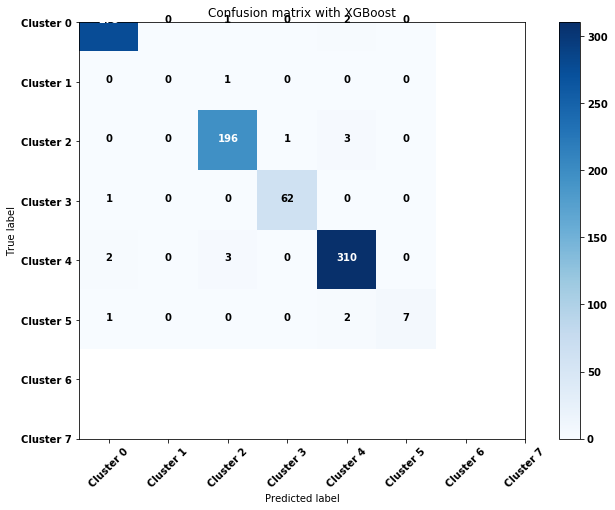

In [277]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with XGBoost')